# Intro to Pandas

In [246]:
import numpy as np

In [247]:
import pandas as pd

In [248]:
np.arange(16).reshape(4,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [249]:
df = pd.DataFrame(np.arange(16).reshape(4,4), 
                  index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                  columns = ['one', 'two','three','four'])

In [250]:
df.head()

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [251]:
df['three']

Ohio         2
Colorado     6
Utah        10
New York    14
Name: three, dtype: int32

In [252]:
df.three

Ohio         2
Colorado     6
Utah        10
New York    14
Name: three, dtype: int32

In [253]:
type(df['three'])

pandas.core.series.Series

In [254]:
type(df[['two','three']])

pandas.core.frame.DataFrame

In [255]:
df[df.three > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [256]:
df[df.three > 5] = -1 
print (df)

          one  two  three  four
Ohio        0    1      2     3
Colorado   -1   -1     -1    -1
Utah       -1   -1     -1    -1
New York   -1   -1     -1    -1





### Reading Files, Selecting Columns, and Summarizing

We'll be using the following datasets in this notebook:

MovieLens 100k movie rating data:
    main page: http://grouplens.org/datasets/movielens/
    data dictionary: http://files.grouplens.org/datasets/movielens/ml-100k-README.txt
    files: u.user, u.data, u.item

WHO alcohol consumption data:
    article: http://fivethirtyeight.com/datalab/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/    
    original data: https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption
    file: drinks.csv


In [257]:
#You can read a file from local computer or directly from a URL
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT7/master/data/u.user')

In [258]:
users

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101
5,7|57|M|administrator|91344
6,8|36|M|administrator|05201
7,9|29|M|student|01002
8,10|53|M|lawyer|90703
9,11|39|F|other|30329


In [259]:
users.replace?

In [260]:
type(users)

pandas.core.frame.DataFrame

In [261]:
# read 'u.user' into 'users'
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT7/master/data/u.user', sep='|', 
                      header=None, 
                      names=user_cols, 
                      index_col='user_id', 
                      dtype={'zip_code':str})

# examine the users data
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [262]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [263]:
type(1)

int

In [264]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

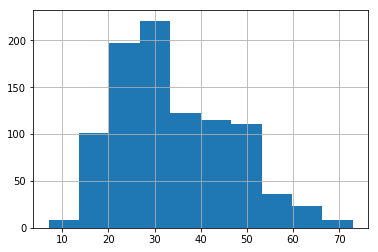

In [265]:
%matplotlib inline
users['age'].hist()

(0, 50)

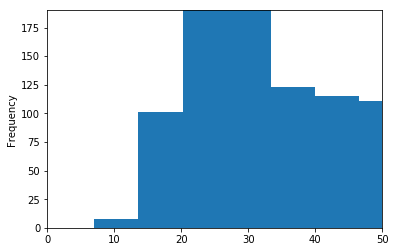

In [266]:
ax = users['age'].plot(kind='hist')
ax.set_ylim([0, 190])
ax.set_xlim(0,50)

In [267]:
users[users.age > 20]

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [268]:
users.head()            # print the first 5 rows

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [269]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [270]:
users.head(10)          # print the first 10 rows

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [271]:
users.tail()            # print the last 5 rows

,age,gender,occupation,zip_code
user_id,,,,
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209
943,22,M,student,77841


In [272]:
users.index             # "the index" (aka "the labels")

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [273]:
users.columns           # column names (which is "an index")

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [274]:
users.dtypes            # data types of each column

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [275]:
users.shape             # number of rows and columns

(943, 4)

In [276]:
users.values            # underlying numpy array

array([[24, 'M', 'technician', '85711'],
       [53, 'F', 'other', '94043'],
       [23, 'M', 'writer', '32067'],
       ..., 
       [20, 'M', 'student', '97229'],
       [48, 'F', 'librarian', '78209'],
       [22, 'M', 'student', '77841']], dtype=object)

In [277]:
users.info()            # concise summary (including memory usage)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [278]:
# select a column
users['gender'].head()         # select one column

user_id
1    M
2    F
3    M
4    M
5    F
Name: gender, dtype: object

In [279]:
type(users['gender'])   # Series

pandas.core.series.Series

In [280]:
users.gender.head()          # select one column using the DataFrame attribute

user_id
1    M
2    F
3    M
4    M
5    F
Name: gender, dtype: object

In [281]:
# summarize (describe) the data
users.describe()                    # describe all numeric columns

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [282]:
users.describe(include=['object'])  # describe all object columns (can include multiple types)

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [283]:
users.describe(include='all')       # describe all columns

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [284]:
users.gender.describe()             # describe a single column

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [285]:
users.age.mean()                    # only calculate the mean

34.05196182396607

In [286]:
# count the number of occurrences of each value
users.gender.value_counts()     # most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

In [287]:
users.age.value_counts()        # can also be used with numeric variables

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

In [288]:
# read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_table('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv', sep=',')
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')             

In [289]:
# print the head and the tail
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [290]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5
192,Zimbabwe,64,18,4,4.7


In [291]:
# examine the default index, data types, and shape
print(drinks.index)
print(drinks.dtypes)
print(drinks.shape)

RangeIndex(start=0, stop=193, step=1)
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object
(193, 5)


In [292]:
# print the 'beer_servings' Series
drinks['beer_servings'].head()

0      0
1     89
2     25
3    245
4    217
Name: beer_servings, dtype: int64

In [293]:
drinks.beer_servings.head()

0      0
1     89
2     25
3    245
4    217
Name: beer_servings, dtype: int64

In [294]:
# calculate the average 'beer_servings' for the entire dataset
drinks.describe()                   # summarize all numeric columns

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [295]:
drinks.beer_servings.describe()     # summarize only the 'beer_servings' Series

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [296]:
drinks.beer_servings.mean()         # only calculate the mean

106.16062176165804

### Filtering and Sorting

In [297]:
# logical filtering: only show users with age < 20
young_bool = users.age < 20         # create a Series of booleans...

In [352]:
users[young_bool].head()                   # ...and use that Series to filter rows

,age,gender,occupation,zip_code,is_male
user_id,,,,,
30,7,M,student,55436,1
36,19,F,student,93117,0
52,18,F,student,55105,0
57,16,M,none,84010,1
67,17,M,student,60402,1


In [353]:
users[users.age < 20].head()               # or, combine into a single step

,age,gender,occupation,zip_code,is_male
user_id,,,,,
30,7,M,student,55436,1
36,19,F,student,93117,0
52,18,F,student,55105,0
57,16,M,none,84010,1
67,17,M,student,60402,1


In [300]:
users[users.age < 20].occupation.head()    # select one column from the filtered results

user_id
30    student
36    student
52    student
57       none
67    student
Name: occupation, dtype: object

In [301]:
users[users.age < 20].occupation.value_counts()     # value_counts of resulting Series

student          64
other             4
none              3
writer            2
entertainment     2
salesman          1
artist            1
Name: occupation, dtype: int64

In [302]:
# logical filtering with multiple conditions
users[(users.age < 20) & (users.gender=='M')].head(10)       # ampersand for AND condition

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
57,16,M,none,84010
67,17,M,student,60402
68,19,M,student,22904
101,15,M,student,05146
110,19,M,student,77840
142,13,M,other,48118
179,15,M,entertainment,20755
221,19,M,student,20685


In [303]:
users[(users.age < 20) | (users.age > 60)].head(10)          # pipe for OR condition

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
36,19,F,student,93117
52,18,F,student,55105
57,16,M,none,84010
67,17,M,student,60402
68,19,M,student,22904
101,15,M,student,05146
106,61,M,retired,55125
110,19,M,student,77840


In [304]:
users[users.occupation.isin(['doctor', 'lawyer'])].head(10)  # alternative to multiple OR conditions

,age,gender,occupation,zip_code
user_id,,,,
10,53,M,lawyer,90703
125,30,M,lawyer,22202
126,28,F,lawyer,20015
138,46,M,doctor,53211
161,50,M,lawyer,55104
205,47,M,lawyer,06371
251,28,M,doctor,85032
299,29,M,doctor,63108
339,35,M,lawyer,37901


In [305]:
users.sort_values('age').head(10)                   # sort a DataFrame by a single column

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
471,10,M,student,77459
289,11,M,none,94619
880,13,M,student,83702
609,13,F,student,55106
142,13,M,other,48118
674,13,F,student,55337
628,13,M,none,94306
813,14,F,student,02136


In [306]:
users.sort_values('age', ascending=False).head(10)  # use descending order instead

,age,gender,occupation,zip_code
user_id,,,,
481,73,M,retired,37771
803,70,M,administrator,78212
767,70,M,engineer,00000
860,70,F,retired,48322
585,69,M,librarian,98501
559,69,M,executive,10022
349,68,M,retired,61455
573,68,M,retired,48911
211,66,M,salesman,32605


In [307]:
users.sort_values(['occupation', 'age'],).head(10)   # sort by multiple columns

,age,gender,occupation,zip_code
user_id,,,,
118,21,M,administrator,90210
180,22,F,administrator,60202
282,22,M,administrator,20057
317,22,M,administrator,13210
439,23,F,administrator,20817
509,23,M,administrator,10011
394,25,M,administrator,96819
665,25,M,administrator,55412
726,25,F,administrator,80538


### Renaming, Adding, and Removing Columns

In [308]:
# renaming one or more columns
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


In [309]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [310]:
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [311]:
drinks_two = drinks.copy()

In [312]:
drinks_two.head()

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [313]:
drinks.head()

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [314]:
# replace all column names
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters']
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv', sep=',', header=0, names=drink_cols)  # replace during file reading
drinks.columns = drink_cols    

In [315]:
# add a new column as a function of existing columns
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

In [316]:
drinks.head()

,country,beer,spirit,wine,liters,servings,mL
0,Afghanistan,0,0,0,0.0,0,0.0
1,Albania,89,132,54,4.9,275,4900.0
2,Algeria,25,0,14,0.7,39,700.0
3,Andorra,245,138,312,12.4,695,12400.0
4,Angola,217,57,45,5.9,319,5900.0


In [317]:
# removing columns
drinks.drop('mL', axis=1)                               # axis=0 for rows, 1 for columns
drinks.drop(['mL', 'servings'], axis=1)                 # drop multiple columns
drinks.drop(['mL', 'servings'], axis=1, inplace=True)   # make it permanent

In [330]:
#jumping back to users df
# for each occupation in 'users', count the number of occurrences
users.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [331]:
# for each occupation, calculate the mean age
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [332]:
# for each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [333]:
# for each combination of occupation and gender, calculate the mean age
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666